In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import json

In [3]:
!wget http://www.meteor.iastate.edu/~jthielen/events_thesis_final.csv
!wget http://www.meteor.iastate.edu/~jthielen/descriptors_thesis_final.json
!wget http://www.meteor.iastate.edu/~jthielen/cnn_chopped_line_centered_128.npz

--2018-11-26 14:32:55--  http://www.meteor.iastate.edu/~jthielen/events_thesis_final.csv
Resolving www.meteor.iastate.edu (www.meteor.iastate.edu)... 129.186.184.26, 2610:130:104:100::7
Connecting to www.meteor.iastate.edu (www.meteor.iastate.edu)|129.186.184.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1719201 (1.6M) [text/csv]
Saving to: ‘events_thesis_final.csv.3’

events_thesis_final 100%[===================>]   1.64M  2.49MB/s    in 0.7s    

2018-11-26 14:32:56 (2.49 MB/s) - ‘events_thesis_final.csv.3’ saved [1719201/1719201]

--2018-11-26 14:32:58--  http://www.meteor.iastate.edu/~jthielen/descriptors_thesis_final.json
Resolving www.meteor.iastate.edu (www.meteor.iastate.edu)... 129.186.184.26, 2610:130:104:100::7
Connecting to www.meteor.iastate.edu (www.meteor.iastate.edu)|129.186.184.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69208 (68K) [application/json]
Saving to: ‘descriptors_thesis_final.json.3’

descriptors

In [4]:
df = pd.read_csv('events_thesis_final.csv')
df

,Unnamed: 0,year,month,day,hour,slice_id,mode,centroid_latitude,centroid_longitude,area,...,edge_proportion_min_is_none,edge_proportion_min_is_stratiform,edge_proportion_min_is_convective,edge_proportion_mean_is_none,edge_proportion_mean_is_stratiform,edge_proportion_mean_is_convective,edge_proportion_mean_is_intense,edge_mean_length,cell_centroid_spread,cell_centroid_r_square
0,0,2004,5,1,1,4,PS,31.346877,266.970868,8872,...,0.200000,0.600000,0.200000,0.000000,0.400000,0.600000,0.000000,77.523661,6.0,0.990477
1,1,2004,5,11,2,3,TS,30.464679,257.596274,18160,...,0.333333,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,54.072678,20.0,0.237708
2,2,2004,5,12,2,0,BE,45.498169,260.988778,134624,...,0.590909,0.409091,0.000000,0.272727,0.654545,0.072727,0.000000,98.648519,106.0,0.638620
3,3,2004,5,12,2,1,BE,30.834317,266.197046,49700,...,0.800000,0.200000,0.000000,0.500000,0.466667,0.033333,0.000000,116.661981,58.0,0.495779
4,4,2004,5,12,2,2,NL,33.687689,267.043985,9064,...,0.400000,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,95.953815,11.0,0.906525
5,5,2004,5,12,20,0,TS,32.450580,269.633123,116836,...,0.777778,0.222222,0.000000,0.322222,0.655556,0.022222,0.000000,101.243087,285.0,0.022729
6,6,2004,5,12,20,1,CC,31.682891,274.831340,21668,...,0.863636,0.136364,0.000000,0.386364,0.522727,0.090909,0.000000,60.641611,54.5,0.271210
7,7,2004,5,12,20,2,BL,32.165280,277.668786,3916,...,0.833333,0.166667,0.000000,0.000000,0.833333,0.166667,0.000000,70.705294,12.5,0.712585
8,8,2004,5,13,0,0,TS,30.970528,270.063425,56276,...,0.789474,0.210526,0.000000,0.000000,0.894737,0.105263,0.000000,101.919822,48.0,0.701246
9,9,2004,5,14,22,0,NL,32.061236,268.160077,89348,...,0.722892,0.277108,0.000000,0.277108,0.710843,0.012048,0.000000,86.623311,122.0,0.271515


In [5]:
with open('descriptors_thesis_final.json', 'r') as rfile:
    descriptors = json.load(rfile)

descriptors

['20040501T0100Z_4_PS',
 '20040511T0200Z_3_TS',
 '20040512T0200Z_0_BE',
 '20040512T0200Z_1_BE',
 '20040512T0200Z_2_NL',
 '20040512T2000Z_0_TS',
 '20040512T2000Z_1_CC',
 '20040512T2000Z_2_BL',
 '20040513T0000Z_0_TS',
 '20040514T2200Z_0_NL',
 '20040515T0900Z_0_NL',
 '20040518T1300Z_1_CC',
 '20040518T0600Z_0_TS',
 '20040518T0600Z_1_NS',
 '20040519T0900Z_1_NL',
 '20040502T0400Z_0_TS',
 '20040520T1100Z_0_PS',
 '20040520T1300Z_0_CC',
 '20040521T1800Z_0_BE',
 '20040522T0400Z_0_BE',
 '20040522T0600Z_0_TS',
 '20040523T1300Z_0_SYN',
 '20040523T1400Z_0_SYN',
 '20040523T1400Z_1_SYN',
 '20040523T0400Z_0_PS',
 '20040524T0400Z_0_TS',
 '20040525T2000Z_0_CC',
 '20040525T2100Z_0_NL',
 '20040525T2300Z_0_TS',
 '20040527T2200Z_1_TS',
 '20040527T0500Z_2_LS',
 '20040527T0900Z_2_NL',
 '20040530T0200Z_0_CC',
 '20040509T0100Z_0_BL',
 '20040509T0100Z_3_NL',
 '20040601T0200Z_1_CC',
 '20040610T0200Z_0_BE',
 '20040610T0200Z_1_PS',
 '20040611T2100Z_3_IC',
 '20040612T1000Z_0_NL',
 '20040612T1500Z_0_NL',
 '20040612T15

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
from sklearn import metrics
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import collections

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
with np.load('cnn_chopped_line_centered_128.npz') as data:
    images = data['images']

In [10]:
images.shape

(3000, 128, 128)

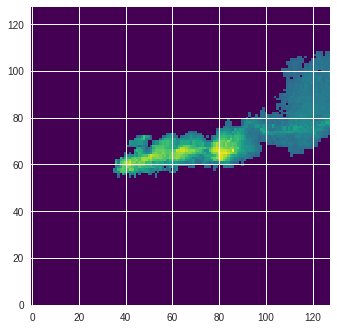

In [11]:
plt.imshow(images[0], origin='lower', cmap='viridis')

In [ ]:
batch_size = 256
num_classes = 10
epochs = 16

labels = ['IC', 'CC', 'BL', 'NS', 'LS', 'PS', 'TS', 'BE', 'NL', 'SYN']

# input image dimensions
img_rows, img_cols = 128, 128

In [ ]:
df = df.replace({'TRP': 'SYN'})

In [ ]:
train_idx = []
test_idx = []
for index, row in df.iterrows():
    if row['year'] < 2007:
        test_idx.append(index)
    elif row['year'] >= 2007:
        train_idx.append(index)

In [ ]:
# Normalize inputs (with adjustment)
#images = images / images.max()
#images = images.astype('float32')

In [16]:
images.min(), images.max(), images.dtype

(0, 90, dtype('int64'))

In [ ]:
x_train = images[train_idx]
y_train = keras.utils.to_categorical(
    np.array([labels.index(val) for val in df['mode'][train_idx]]))
x_test = images[test_idx]
y_test = keras.utils.to_categorical(
    np.array([labels.index(val) for val in df['mode'][test_idx]]))

In [ ]:
input_shape = (1, img_rows, img_cols)
num_classes = len(labels)
keras.backend.set_image_data_format('channels_first')

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
datagen.fit(x_train)

In [23]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

Epoch 1/16
75/74 [==============================] - 117s 2s/step - loss: 2.3128 - acc: 0.1843
Epoch 2/16
75/74 [==============================] - 98s 1s/step - loss: 1.9823 - acc: 0.2801
Epoch 3/16
75/74 [==============================] - 98s 1s/step - loss: 1.7909 - acc: 0.3471
Epoch 4/16
75/74 [==============================] - 98s 1s/step - loss: 1.7109 - acc: 0.3735
Epoch 5/16
75/74 [==============================] - 98s 1s/step - loss: 1.6717 - acc: 0.3872
Epoch 6/16
75/74 [==============================] - 97s 1s/step - loss: 1.5953 - acc: 0.4092
Epoch 7/16
75/74 [==============================] - 98s 1s/step - loss: 1.5245 - acc: 0.4362
Epoch 8/16
75/74 [==============================] - 97s 1s/step - loss: 1.4412 - acc: 0.4703
Epoch 9/16
75/74 [==============================] - 98s 1s/step - loss: 1.3703 - acc: 0.4949
Epoch 10/16
75/74 [==============================] - 97s 1s/step - loss: 1.2921 - acc: 0.5217
Epoch 11/16
75/74 [==============================] - 98s 1s/step - l

In [24]:
prediction_probs = model.predict(x_test, batch_size=batch_size, verbose=1)
predictions = [labels[probs_row.argmax()] for probs_row in prediction_probs]

603/603 [==============================] - 3s 4ms/step


In [25]:
collections.Counter(predictions)

Counter({'BE': 161,
         'BL': 25,
         'CC': 78,
         'IC': 12,
         'LS': 24,
         'NL': 23,
         'NS': 34,
         'PS': 45,
         'SYN': 38,
         'TS': 163})

In [26]:
collections.Counter(df['mode'][test_idx])

Counter({'BE': 80,
         'BL': 65,
         'CC': 86,
         'IC': 53,
         'LS': 21,
         'NL': 73,
         'NS': 39,
         'PS': 35,
         'SYN': 37,
         'TS': 114})

In [27]:
print(metrics.classification_report(df['mode'][test_idx], predictions))
print(metrics.confusion_matrix(df['mode'][test_idx], predictions))
print(metrics.accuracy_score(df['mode'][test_idx], predictions))

             precision    recall  f1-score   support

         BE       0.30      0.61      0.41        80
         BL       0.24      0.09      0.13        65
         CC       0.38      0.35      0.37        86
         IC       1.00      0.23      0.37        53
         LS       0.25      0.29      0.27        21
         NL       0.43      0.14      0.21        73
         NS       0.09      0.08      0.08        39
         PS       0.18      0.23      0.20        35
        SYN       0.29      0.30      0.29        37
         TS       0.31      0.45      0.37       114

avg / total       0.36      0.31      0.29       603

[[49  0  0  0  1  0  3  1  2 24]
 [13  6  7  0  3  1  8  8  3 16]
 [ 9  4 30  0  4  4  4 10  4 17]
 [ 2  5 29 12  0  2  3  0  0  0]
 [ 6  2  1  0  6  0  0  2  2  2]
 [10  4  6  0  2 10  8  5 10 18]
 [11  2  2  0  0  1  3  4  3 13]
 [ 8  1  1  0  1  0  3  8  1 12]
 [ 5  1  1  0  4  3  0  2 11 10]
 [48  0  1  0  3  2  2  5  2 51]]
0.30845771144278605


Confusion matrix
[[49  0  0  0  1  0  3  1  2 24]
 [13  6  7  0  3  1  8  8  3 16]
 [ 9  4 30  0  4  4  4 10  4 17]
 [ 2  5 29 12  0  2  3  0  0  0]
 [ 6  2  1  0  6  0  0  2  2  2]
 [10  4  6  0  2 10  8  5 10 18]
 [11  2  2  0  0  1  3  4  3 13]
 [ 8  1  1  0  1  0  3  8  1 12]
 [ 5  1  1  0  4  3  0  2 11 10]
 [48  0  1  0  3  2  2  5  2 51]]


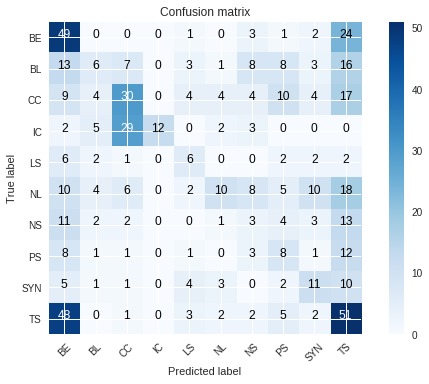

In [28]:
cm = metrics.confusion_matrix(df['mode'][test_idx], predictions)

plt.figure()
plot_confusion_matrix(cm, classes=sorted(labels))
plt.show()

In [29]:
cm

array([[49,  0,  0,  0,  1,  0,  3,  1,  2, 24],
       [13,  6,  7,  0,  3,  1,  8,  8,  3, 16],
       [ 9,  4, 30,  0,  4,  4,  4, 10,  4, 17],
       [ 2,  5, 29, 12,  0,  2,  3,  0,  0,  0],
       [ 6,  2,  1,  0,  6,  0,  0,  2,  2,  2],
       [10,  4,  6,  0,  2, 10,  8,  5, 10, 18],
       [11,  2,  2,  0,  0,  1,  3,  4,  3, 13],
       [ 8,  1,  1,  0,  1,  0,  3,  8,  1, 12],
       [ 5,  1,  1,  0,  4,  3,  0,  2, 11, 10],
       [48,  0,  1,  0,  3,  2,  2,  5,  2, 51]])